<a href="https://colab.research.google.com/github/tabaahi07/Machine-Learning/blob/main/Neural_ntwrk_for_handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [83]:
# mnist - dataset consist of large set of handwritten digits (0 through 9)
from keras.datasets import mnist
# It return 2 tupple of train n test dataset as numpy array
(xtrain , ytrain) , (xtest , ytest) = mnist.load_data()

In [84]:
len(xtrain)
len(xtest)

10000

In [85]:
# Scaling values btw 0 n 1
xtrain = xtrain / 255
xtest = xtest / 255

In [86]:
# 1-image in a set
xtrain[0]
#Num of rows n col in 1 image
xtrain[0].shape

(28, 28)

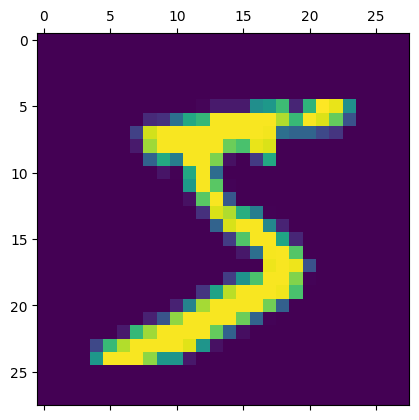

In [87]:
# matshow -- function used to visually represent a 2D matrix or array as a color-coded image
plt.matshow(xtrain[0])

In [88]:
# Now we'll flatten the 2D matrix into 1D
xtrain.shape

(60000, 28, 28)

In [89]:
xtrain_flatten = xtrain.reshape(len(xtrain) , 28*28)
xtrain_flatten.shape
xtest_flatten = xtest.reshape(len(xtest) , 28*28)
#xtest_flatten[0]

In [90]:
# Making a model
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,) , activation='sigmoid')
])
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)
# epochs is num of iterations for which model is goin to run training
model.fit(xtrain_flatten , ytrain , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4661 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9262


In [91]:
# Evaluating model accuracy in test dataset
model.evaluate(xtest_flatten , ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.9256


[0.2713215947151184, 0.925599992275238]

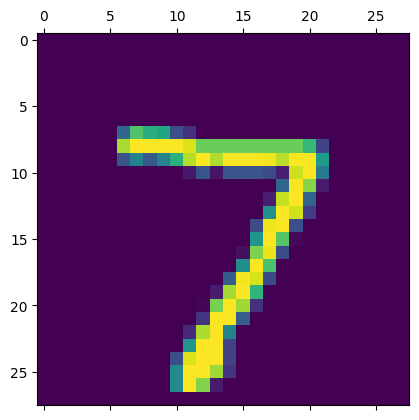

In [92]:
# Predicting values
plt.matshow(xtest[0])

In [93]:
y_pred = model.predict(xtest_flatten)
# it'll give % of all digits
y_pred[0]
# it'll give maxi %
np.argmax(y_pred[0])

313/313 [==============================] - 0s 908us/step


7

In [94]:
# Now , these y_pred are list of all outcome not the final label , so lets get it
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

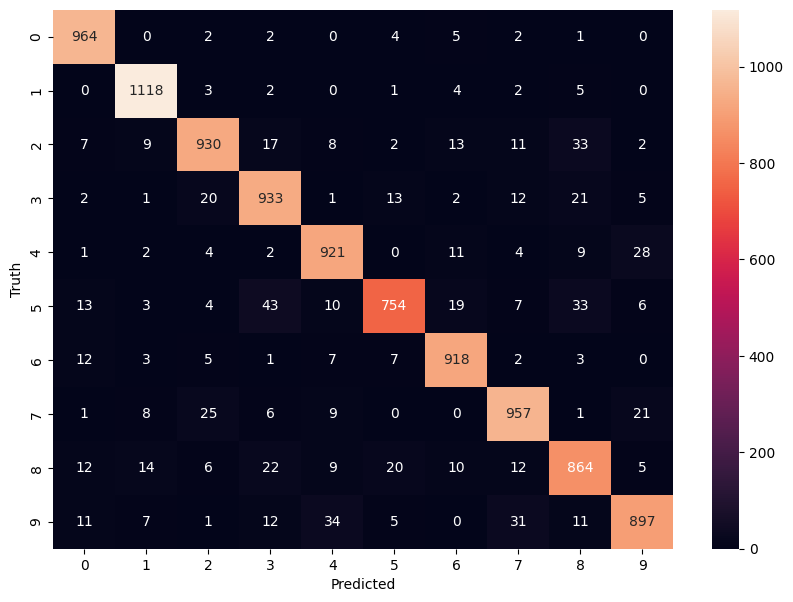

In [95]:
cm = tf.math.confusion_matrix(labels = ytest , predictions = y_pred_labels)
plt.figure(figsize=(10,7))
# fmt = 'd' indicates only integral value
sn.heatmap(cm , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [96]:
# Let's re-build the model with hidden layers
model = keras.Sequential([
    # 100 is num of neurons in hidden layer
    keras.layers.Dense(100 , input_shape=(784,) , activation='relu') ,
    keras.layers.Dense(10 , activation='sigmoid')
])
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)
model.fit(xtrain_flatten , ytrain , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1237 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0517 - accuracy: 0.9840


In [97]:
model.evaluate(xtest_flatten , ytest)
# Accuracy increased bcz of hidden layer

313/313 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9727


[0.08775704354047775, 0.9726999998092651]

In [100]:
# If i don't want to flatten my array
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)) ,
    keras.layers.Dense(100 , activation='relu') ,
    keras.layers.Dense(10 , activation='sigmoid')
])
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)
model.fit(xtrain , ytrain , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2756 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1292 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0898 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0683 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0545 - accuracy: 0.9831
